In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/dataset-for-ml-project/ppi_clean.csv')

In [3]:
df_3 = df.iloc[:, [i.startswith('3') for i in df.columns]]

In [4]:
df.columns

Index(['domain', 'aa_ProtPosition', 'uniprot_id', 'hydrophobicity_scores',
       'Rlength', 'normalized_length', 'normalized_abs_surf_acc',
       'normalized_hydropathy_index', 'rel_surf_acc', 'prob_sheet',
       ...
       '9_wm_pssm_K', '9_wm_pssm_M', '9_wm_pssm_F', '9_wm_pssm_P',
       '9_wm_pssm_S', '9_wm_pssm_T', '9_wm_pssm_W', '9_wm_pssm_Y',
       '9_wm_pssm_V', 'p_interface'],
      dtype='object', length=137)

In [5]:
df = df.drop('uniprot_id', axis= 1)

In [6]:
corr = df.corr()


In [7]:
corr3 = corr.loc[[i.startswith('3') for i in df.columns], :]

In [8]:
import re

In [13]:
def correct_window(df):
    for size in [9,7,5,3]:
        if size == 3:
        
            cols_big = df.loc[:,  [col.startswith(str(size)) for col in df.columns]]
            str_list = [str(col)[5:] for col in cols_big.columns]
            cols_small = df.loc[:,  str_list]
        
        else:
            cols_big = df.loc[:,  [col.startswith(str(size)) for col in df.columns]]
            cols_small = df.loc[:,  [col.startswith(str(size-2)) for col in df.columns]]
        
        cols_small.columns = cols_big.columns
        cols_big_corrected = (size*cols_big - (size-2)*cols_small)/2
        df.loc[:,  [col.startswith(str(size)) for col in df.columns]] = cols_big_corrected
    return df

# example use:
df_corrected_windows = correct_window(df)

In [14]:
correlated_corr = df_corrected_windows.corr()

In [15]:
corr3 = corr.loc[[bool(re.match('3',i)) for i in df.columns], :]

In [16]:
correlated_corr3 = correlated_corr.loc[[bool(re.match('3',i)) for i in df.columns], :]

In [10]:
corr_ori = corr.loc[[not bool(re.match('^\d',i)) for i in df.columns], :]

<Axes: >

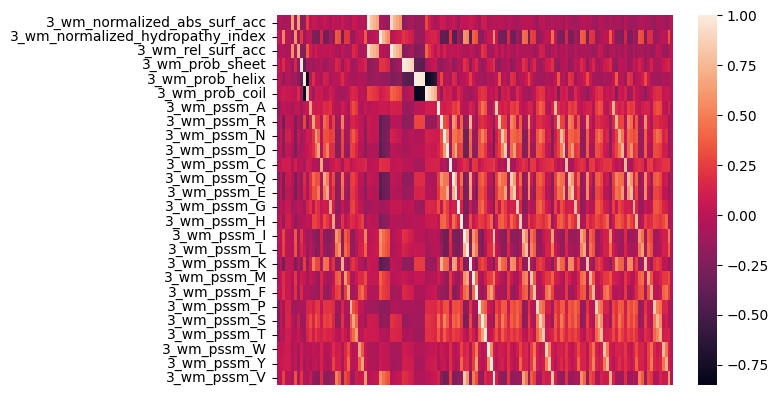

In [11]:
sns.heatmap(corr3, yticklabels = 1, xticklabels = [])

<Axes: >

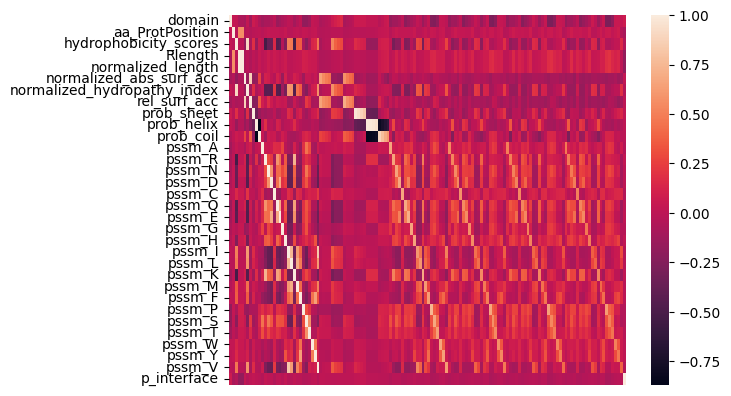

In [18]:
sns.heatmap(corr_ori, yticklabels = 1, xticklabels = [])

<Axes: >

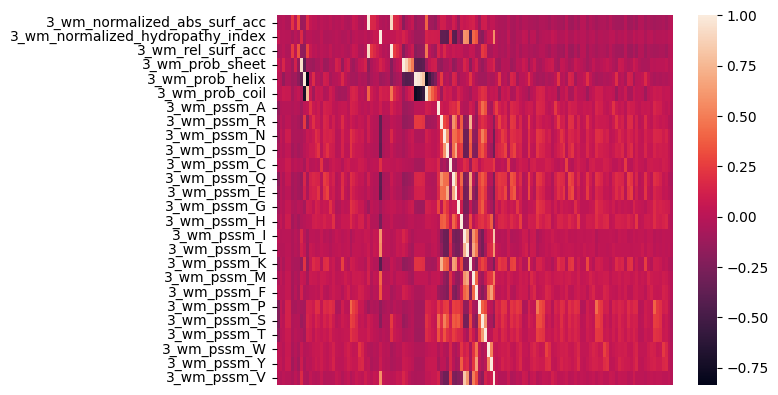

In [17]:
sns.heatmap(correlated_corr3, yticklabels = 1, xticklabels = [])